# **Dev Halvawala - Heuristic Approach**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Step 1: Load the SMA Data
file_path = '/content/drive/MyDrive/Colab Notebooks/Digantara Assignment/SMA_data.csv'  # Change this to your file path if needed
sma_data = pd.read_csv(file_path)

In [3]:
# Display the first few rows and the summary information of the dataset
sma_data.head(), sma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  2291 non-null   object 
 1   SMA       2291 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.9+ KB


(                     Datetime          SMA
 0  2018-01-01 04:34:10.320672  6864.691463
 1  2018-01-01 12:37:36.596064  6864.689664
 2  2018-01-01 20:31:55.898112  6864.688585
 3  2018-01-02 05:42:49.014720  6864.684927
 4  2018-01-02 12:13:01.263360  6864.682858,
 None)

In [4]:
# Step 2: Data Preprocessing
# Convert 'Datetime' to datetime format
sma_data['Datetime'] = pd.to_datetime(sma_data['Datetime'])

# Sort data by datetime (just in case it's not sorted)
sma_data = sma_data.sort_values(by='Datetime')

In [5]:
# Step 3: Feature Extraction - Calculate the rate of change (SMA derivative)
sma_data['SMA_diff'] = sma_data['SMA'].diff()  # First derivative (difference)
sma_data['Time_diff'] = sma_data['Datetime'].diff().dt.total_seconds()  # Time difference in seconds

# Calculate the rate of change in SMA per second
sma_data['SMA_rate_of_change'] = sma_data['SMA_diff'] / sma_data['Time_diff']

In [6]:
# Step 4: Detect Maneuvers based on SMA rate of change
# Define a threshold for rate of change that indicates a maneuver
threshold = 0.00001  # This threshold can be adjusted based on data analysis

# Detect where the absolute value of rate of change exceeds the threshold
sma_data['Maneuver'] = np.where(sma_data['SMA_rate_of_change'].abs() > threshold, 1, 0)

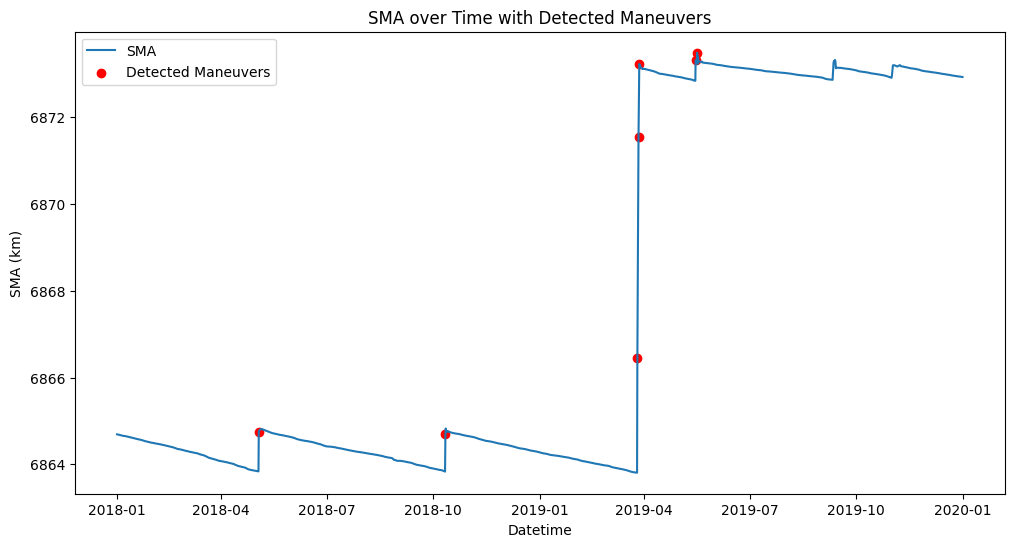

In [7]:
# Step 5: Plot the results and detected maneuvers
plt.figure(figsize=(12, 6))
plt.plot(sma_data['Datetime'], sma_data['SMA'], label='SMA')
plt.scatter(sma_data[sma_data['Maneuver'] == 1]['Datetime'], sma_data[sma_data['Maneuver'] == 1]['SMA'],
            color='red', label='Detected Maneuvers')
plt.xlabel('Datetime')
plt.ylabel('SMA (km)')
plt.title('SMA over Time with Detected Maneuvers')
plt.legend()
plt.show()

In [8]:
# Step 6: Extract the detected maneuvers for validation
detected_maneuvers = sma_data[sma_data['Maneuver'] == 1][['Datetime', 'SMA']]
print("Detected Maneuvers:\n", detected_maneuvers)

Detected Maneuvers:
                        Datetime          SMA
384  2018-05-03 12:01:31.056960  6864.749568
871  2018-10-11 13:37:04.556640  6864.695930
1421 2019-03-26 04:53:33.243936  6866.447702
1422 2019-03-27 04:34:36.436800  6871.548711
1423 2019-03-27 20:25:37.599168  6873.222542
1583 2019-05-15 10:44:36.864096  6873.309430
1585 2019-05-16 16:43:16.023072  6873.480508


In [11]:
# Step 7: Compare detected maneuvers with known maneuver dates (from the reference table)
# Known maneuver dates from the assignment document
known_maneuvers = pd.to_datetime(['2018-05-03', '2018-10-11', '2019-03-27', '2019-05-17', '2019-09-11', '2019-11-01'])

# Simple comparison - Check if detected maneuvers are close to known maneuvers
for known_date in known_maneuvers:
    closest_maneuver = detected_maneuvers.iloc[(detected_maneuvers['Datetime'] - known_date).abs().argsort()[:1]]
    print(f"Known maneuver: {known_date}, Closest detected maneuver: {closest_maneuver['Datetime'].values[0]}")

Known maneuver: 2018-05-03 00:00:00, Closest detected maneuver: 2018-05-03T12:01:31.056960000
Known maneuver: 2018-10-11 00:00:00, Closest detected maneuver: 2018-10-11T13:37:04.556640000
Known maneuver: 2019-03-27 00:00:00, Closest detected maneuver: 2019-03-27T04:34:36.436800000
Known maneuver: 2019-05-17 00:00:00, Closest detected maneuver: 2019-05-16T16:43:16.023072000
Known maneuver: 2019-09-11 00:00:00, Closest detected maneuver: 2019-05-16T16:43:16.023072000
Known maneuver: 2019-11-01 00:00:00, Closest detected maneuver: 2019-05-16T16:43:16.023072000
